# QDA parameter search

Duncan Tulimieri

In [1]:
# import libraries 
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16}) 
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import time
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns
# personal classes
from ProcessData import ProcessForestData
import savingfigR as sf 

In [2]:
class pQDA(ProcessForestData):
    
    reg_param_options = np.linspace(0, 0.3, 50)

    def __init__(self):
        # method calls 
        self.X_train, self.X_test, self.y_train, self.y_test = self.load_data(perform_scale=False, sub_data_section='')
        # Raw data 
        start = time.time()
        QDA_trained_opt, mean_test_score = self.optimize_QDA_params(self.X_train, self.y_train)
        QDA_score = self.score_QDA(QDA_trained_opt, self.X_test, self.y_test)
        self.param_plot_QDA(mean_test_score=mean_test_score)
        end = time.time()
        print(f'Raw data QDA optimal score = {QDA_score}')
        print(f'Time taken = {end-start}')

    # model 
    def train_QDA(self, X, y, reg_param):
        return QuadraticDiscriminantAnalysis(reg_param=reg_param).fit(X, y)
    
    def score_QDA(self, trained_QDA_model, X_test, y_test):
        return trained_QDA_model.score(X_test, y_test) 

    def predict_QDA(self, trained_QDA_model, X_test):
        return trained_QDA_model.predict(X_test)

    def optimize_QDA_params(self, X_train, y_train, reg_param_options=reg_param_options, cv=10, scoring='accuracy'):
        QDA_raw = QuadraticDiscriminantAnalysis()
        cv_train_model = GridSearchCV(QDA_raw, param_grid={'reg_param': reg_param_options}, cv=cv, scoring=scoring).fit(X_train, y_train)
        mean_test_score = cv_train_model.cv_results_['mean_test_score']
        print(f'Best QDA parameters: reg_param = {cv_train_model.best_params_["reg_param"]}')
        best_model = self.train_QDA(X_train, y_train, reg_param=cv_train_model.best_params_["reg_param"])
        return best_model, mean_test_score

    # visualization 
    def param_plot_QDA(self, mean_test_score):
        plt_styles, bgs = ['seaborn-bright', 'dark_background'], ['_wbg', '_kbg']
        for bg, style in zip(bgs, plt_styles):
            with plt.style.context(style):
                fig = plt.figure()
                ax = sns.barplot(x=np.round(self.reg_param_options,2), y=mean_test_score)
                ax.set_xticks(ax.get_xticks()[::5])
                plt.xticks(rotation=45)
                plt.xlabel('Regulating parameter')
                plt.ylabel('CV Scores for QDA parameter')
                plt.show()
                sf.best_save(fig, 'QDA_params'+bg)

Best QDA parameters: reg_param = 0.15306122448979592


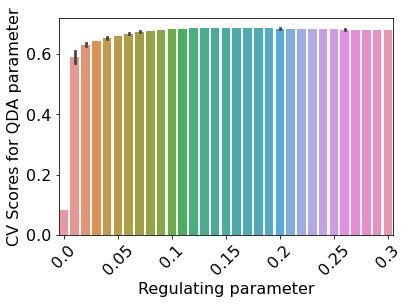

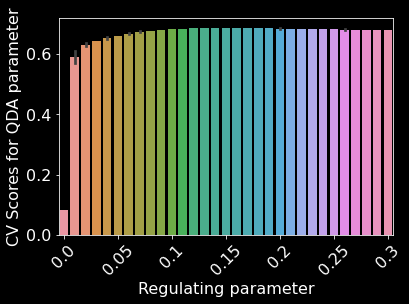

Raw data QDA optimal score = 0.6861385729628507
Time taken = 1527.803603887558


In [3]:
testQDA = pQDA()